## Imports and Definitions

In [1]:
from glob import glob
from gzip import open as gopen
from math import sqrt
from matplotlib import rcParams
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
from os import makedirs
from os.path import getsize
from seaborn import boxenplot,pointplot,regplot,set_context,set_style,violinplot
import matplotlib.pyplot as plt
FIGDIR = '../figs'; makedirs(FIGDIR, exist_ok=True)
set_context("paper", rc={"font.size":12,"axes.titlesize":16,"axes.labelsize":14,"legend.fontsize":10,"xtick.labelsize":10,"ytick.labelsize":10})
set_style("ticks")
rcParams['font.family'] = 'serif'
label = {
    'db': 'ViReaDB (including reads)',
    'db_noreads': 'ViReaDB (excluding reads)',
    'compute_counts': 'Compute Base/Insertion Counts',
    'compute_consensus': 'Compute Consensus Sequence',
    'memory': 'Peak Memory',
}
color = {
    'axis_bar': 'lightgrey',
    'db': '#DDAA33', # yellow
    'db_noreads': '#004488', # blue
    'compute_counts': 'salmon',
    'compute_consensus': 'darkgreen',
    'memory': 'green',
}
linestyle = {
    'db': '-',
    'db_noreads': '--',
    'compute_counts': '-',
    'compute_consensus': ':',
    'memory': '-',
}
search = {
    'compute_counts': "Time to Compute Counts",
    'compute_consensus': "Time to Compute Consensus",
    'memory': "Peak Memory",
}

## Database File Size vs. Number of Mapped Reads

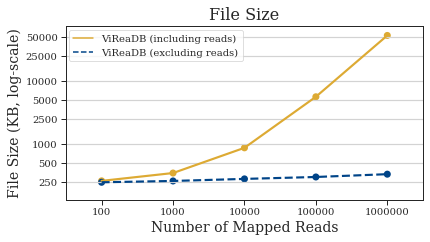

In [2]:
yticks = [250, 500, 1000, 2500, 5000, 10000, 25000, 50000]
fig = plt.figure(figsize=(6.4,3.2)); handles = list()
for y in yticks:
    plt.plot([-100,100], [y,y], color=color['axis_bar'])
for db_type in ['db', 'db_noreads']:
    handles.append(Line2D([0], [0], color=color[db_type], label=label[db_type], linestyle=linestyle[db_type], linewidth=1.5))
    x = list(); y = list()
    for n in sorted(int(d.split('/')[-1].lstrip('n')) for d in glob('../data/%s/*0' % db_type)):
        for fn in glob('../data/%s/n%d/*.db' % (db_type, n)):
            x.append(n); y.append(getsize(fn) / 1024)
    ax = pointplot(x=x, y=y, color=color[db_type], linestyles=linestyle[db_type])
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.minorticks_off()
ax.set_yticks(yticks)
plt.xlim(-0.5, len(set(x))-1+0.5)
plt.ylim(130, 75000)
plt.title("File Size")
plt.xlabel("Number of Mapped Reads")
plt.ylabel("File Size (KB, log-scale)")
legend = plt.legend(handles=handles,bbox_to_anchor=(0.01, 0.975), loc='upper left', borderaxespad=0., frameon=True)
fig.savefig('%s/filesize.pdf' % FIGDIR, format='pdf', bbox_inches='tight')

## Runtime vs. Number of Mapped Reads

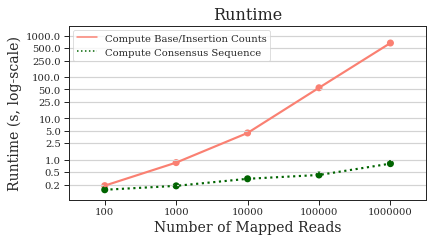

In [3]:
yticks = [0.25, 0.5, 1, 2.5, 5, 10, 25, 50, 100, 250, 500, 1000]
fig = plt.figure(figsize=(6.4,3.2)); handles = list()
for y in yticks:
    plt.plot([-100,100], [y,y], color=color['axis_bar'])
for time_type in ['compute_counts', 'compute_consensus']:
    handles.append(Line2D([0], [0], color=color[time_type], label=label[time_type], linestyle=linestyle[time_type], linewidth=1.5))
    x = list(); y = list()
    for n in sorted(int(d.split('/')[-1].lstrip('n')) for d in glob('../data/benchmark/*0')):
        for fn in glob('../data/benchmark/n%d/*.txt' % n):
            x.append(n); y.append([float(l.split('\t')[-1]) for l in open(fn) if l.startswith(search[time_type])][0])
    ax = pointplot(x=x, y=y, color=color[time_type], linestyles=linestyle[time_type])
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.minorticks_off()
ax.set_yticks(yticks)
plt.xlim(-0.5, len(set(x))-1+0.5)
plt.ylim(0.11, 1750)
plt.title("Runtime")
plt.xlabel("Number of Mapped Reads")
plt.ylabel("Runtime (s, log-scale)")
legend = plt.legend(handles=handles,bbox_to_anchor=(0.01, 0.975), loc='upper left', borderaxespad=0., frameon=True)
fig.savefig('%s/runtime.pdf' % FIGDIR, format='pdf', bbox_inches='tight')

## Peak Memory vs. Number of Mapped Reads

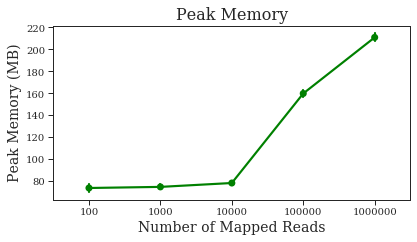

In [4]:
fig = plt.figure(figsize=(6.4,3.2))
x = list(); y = list()
for n in sorted(int(d.split('/')[-1].lstrip('n')) for d in glob('../data/benchmark/*0')):
    for fn in glob('../data/benchmark/n%d/*.txt' % n):
        x.append(n); y.append([int(l.split('\t')[-1])/1024 for l in open(fn) if l.startswith(search['memory'])][0])
ax = pointplot(x=x, y=y, color=color['memory'], linestyles=linestyle['memory'])
plt.title("Peak Memory")
plt.xlabel("Number of Mapped Reads")
plt.ylabel("Peak Memory (MB)")
fig.savefig('%s/memory.pdf' % FIGDIR, format='pdf', bbox_inches='tight')